In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cybersecurity_intrusion_data.csv to cybersecurity_intrusion_data.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
from IPython.display import IFrame
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
CS = pd.read_csv('cybersecurity_intrusion_data.csv')

In [ ]:
CS.head(5)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
CS.tail(5)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0
9536,SID_09537,340,TCP,6,86.876744,NaN,0.277069,4,Chrome,1,1


In [ ]:
CS.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [ ]:
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [ ]:
CS.isnull().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [ ]:
CS.value_counts()

,,,,,,,,,,,count
session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected,
SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1,1
SID_06364,636,UDP,2,1036.071875,AES,0.125196,1,Firefox,0,0,1
SID_06378,512,TCP,2,640.807355,AES,0.555993,3,Chrome,0,1,1
SID_06377,571,TCP,7,63.234896,AES,0.280283,2,Chrome,0,1,1
SID_06376,719,UDP,2,1395.137992,AES,0.225661,1,Firefox,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
SID_03193,956,ICMP,5,845.487622,AES,0.240835,1,Firefox,0,0,1
SID_03192,642,TCP,3,15.740660,DES,0.450856,3,Chrome,0,1,1
SID_03191,418,TCP,3,881.725230,AES,0.513619,2,Chrome,0,0,1


In [ ]:
CS.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-14-52a8329fe9b4>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


-EDA-

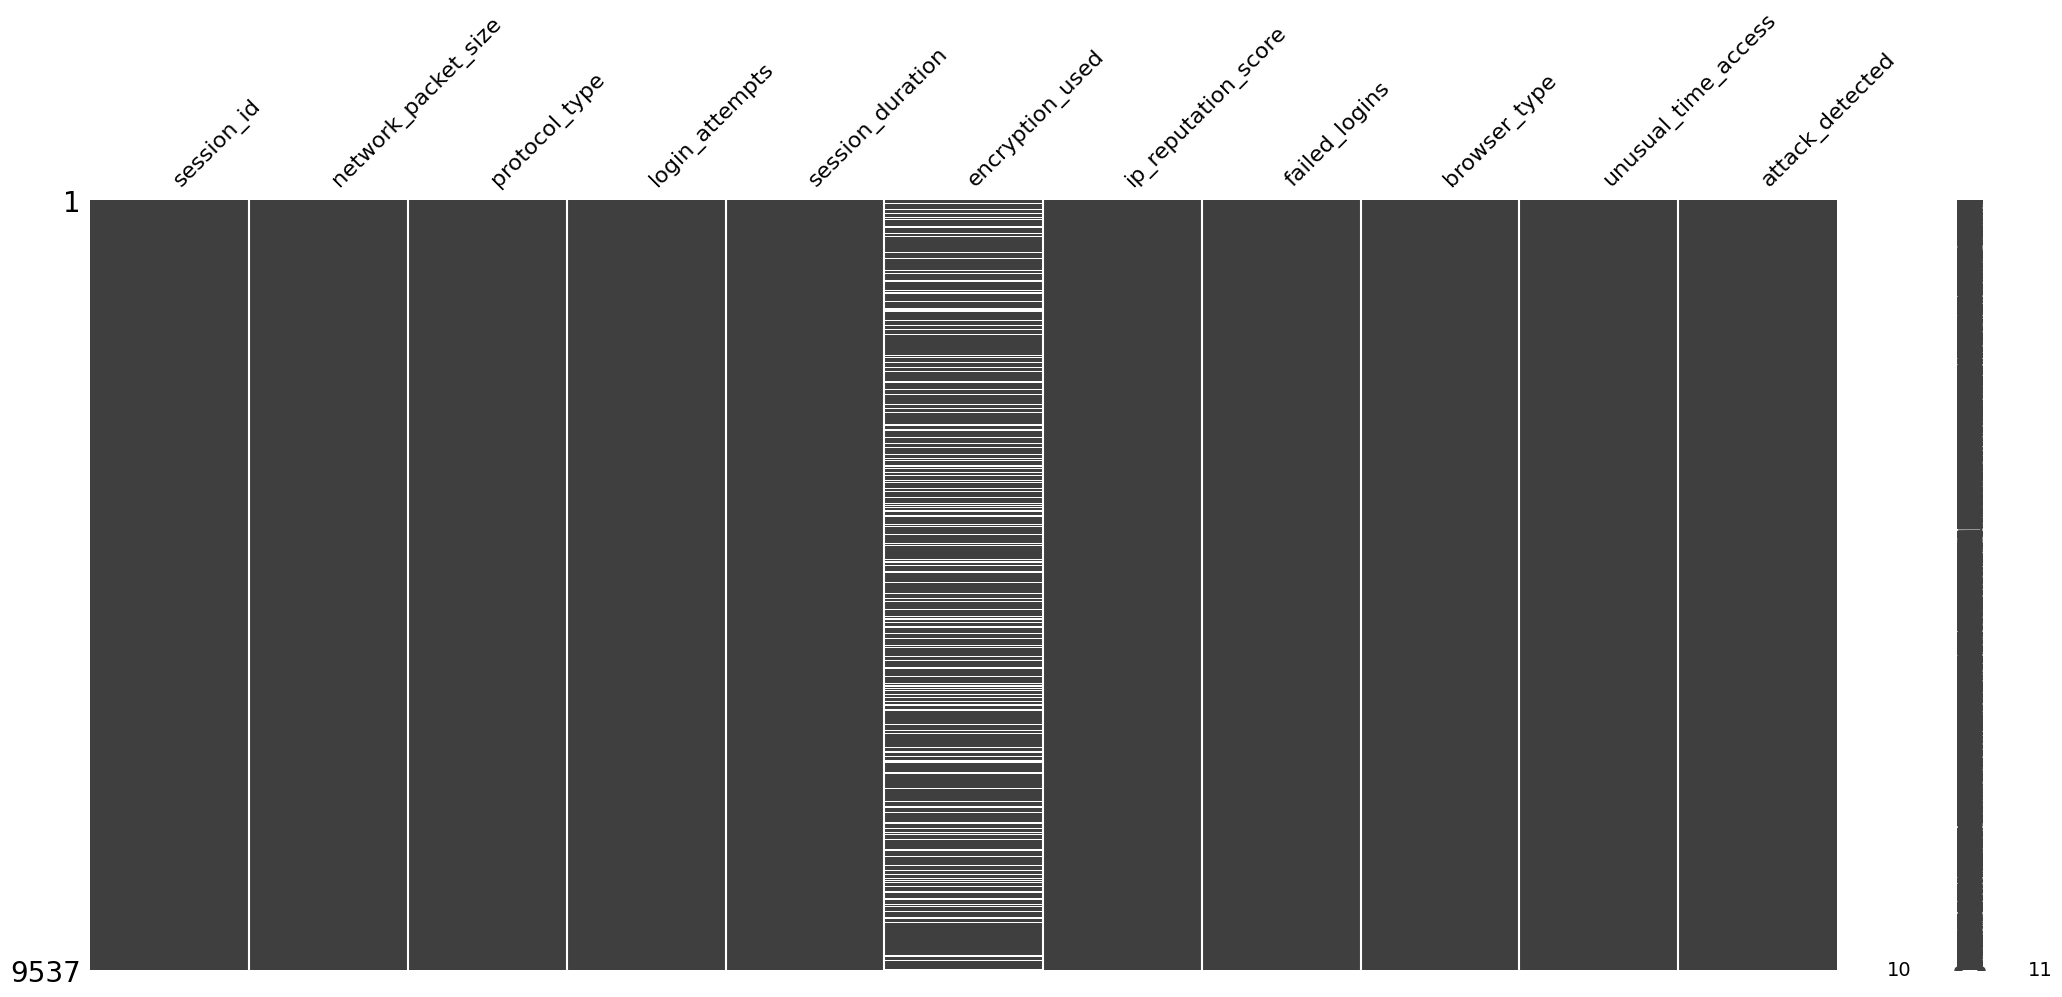

In [ ]:
msno.matrix(CS)
plt.show()

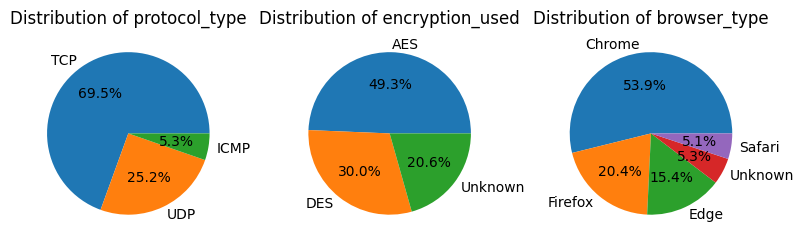

In [ ]:
CS["encryption_used"] = CS["encryption_used"].fillna("Unknown")
category_columns = ["protocol_type", "encryption_used", "browser_type"]
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(8, 15))
ax = ax.flatten()

for i, cat in enumerate(category_columns):
    CS[cat].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax[i])
    ax[i].set_title(f"Distribution of {cat}")
    ax[i].set_ylabel("")

plt.tight_layout()
plt.show()

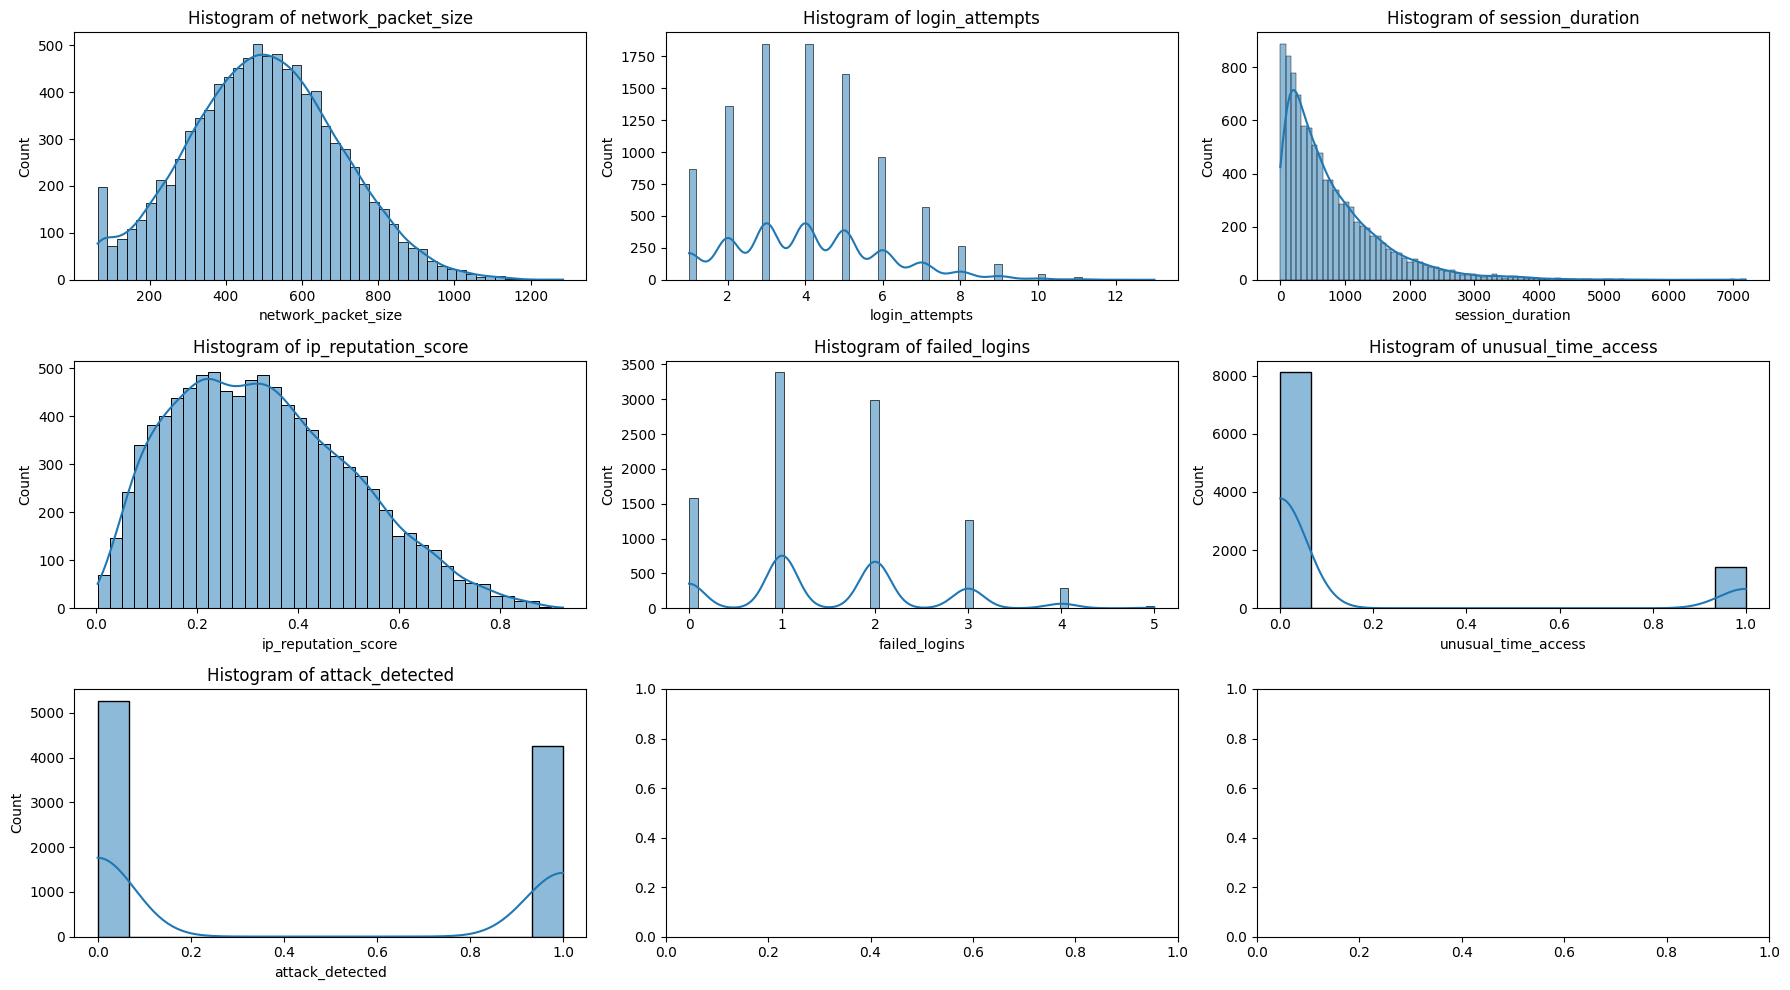

In [ ]:
numerical_features = CS.select_dtypes(include=np.number).columns
# Adjusted rows and cols to accommodate 7 features
rows, cols = 3, 3  # Now you have 9 subplots (3 rows * 3 columns = 9)
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(CS[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Drop the 'session_id' column
if 'session_id' in CS.columns:
    CS1 = CS.drop('session_id', axis=1)

In [ ]:
CS.head(5)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


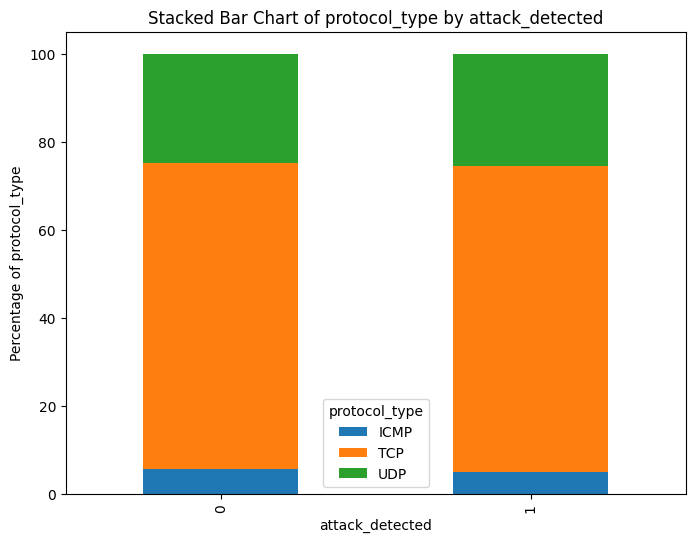

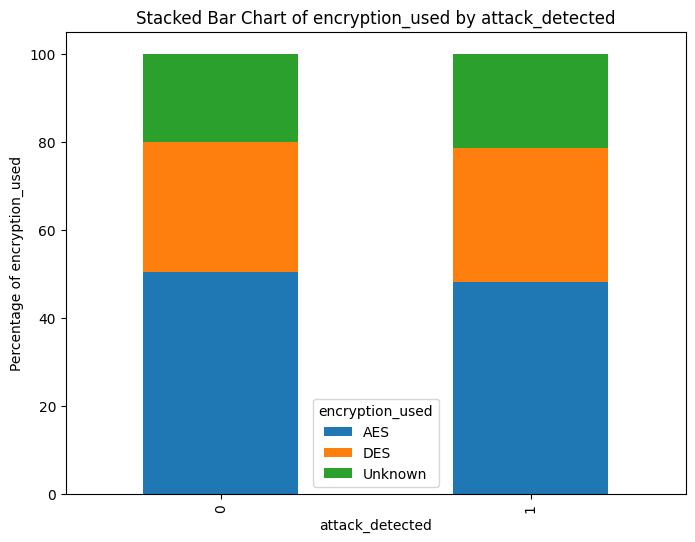

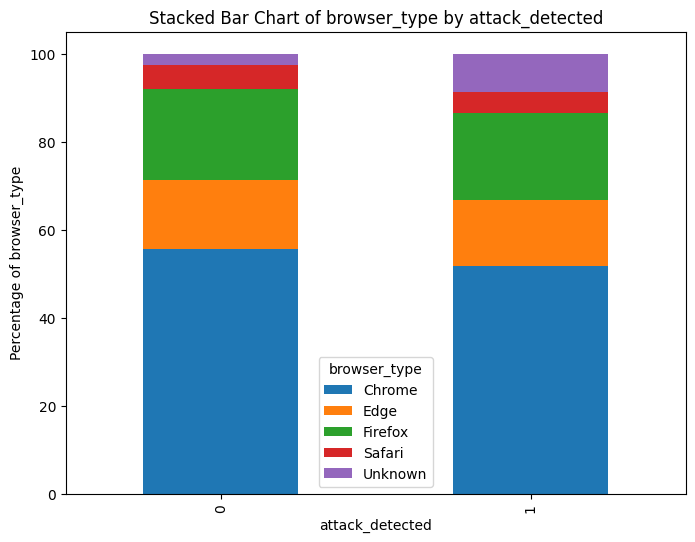

In [ ]:
for cat in category_columns:
    cross_tab = pd.crosstab(CS['attack_detected'], CS[cat])
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6), title=f'Stacked Bar Chart of {cat} by attack_detected')

    plt.xlabel('attack_detected')
    plt.ylabel(f'Percentage of {cat}')
    plt.show()

<Axes: >

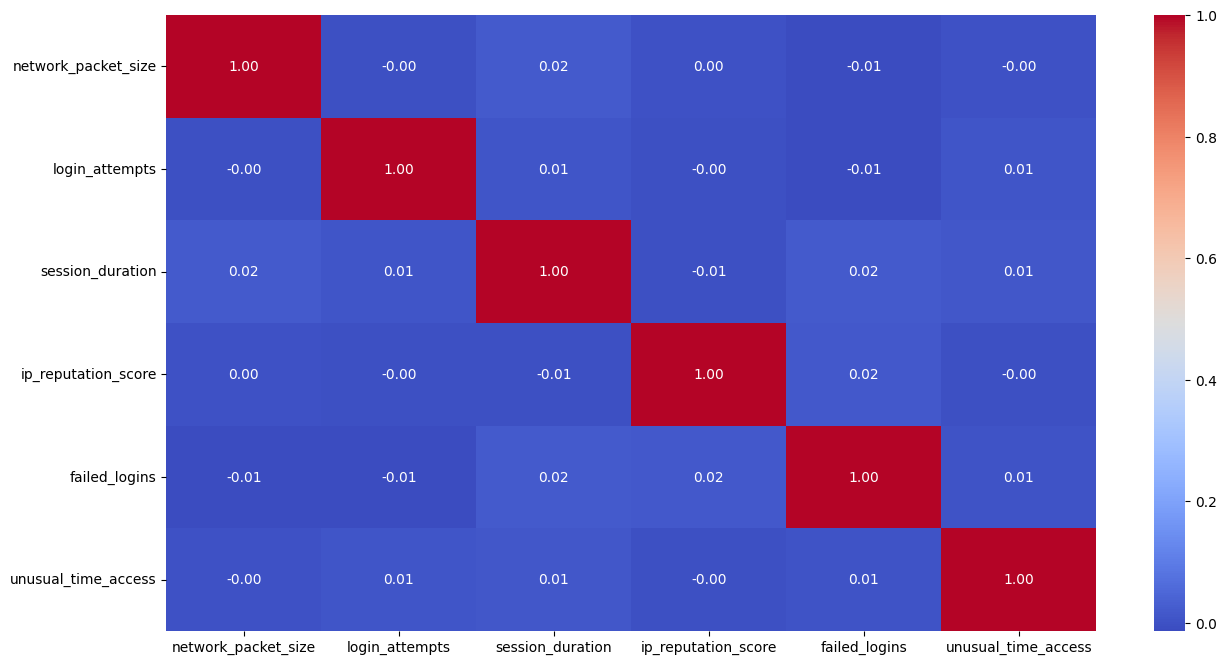

In [ ]:
data = CS[num_columns]
matrix = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)

In [ ]:
data = {
    'login_attempts': [1, 2, 3, 4, 5, 6, 7, 8],
    'network_packet_size': [500, 600, 700, 800, 900, 1000, 1100, 1200],
    'session_duration': [60, 120, 180, 240, 300, 360, 420, 480],
    'reputation_score': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'failed_logins': [0, 1, 2, 3, 1, 0, 2, 3],
    'unusual_time_access': [0, 1, 0, 1, 0, 1, 0, 1],
    'attack_detected': [0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Generate the pair plot
fig = px.scatter_matrix(
    df,
    dimensions=['login_attempts', 'network_packet_size', 'session_duration', 'reputation_score', 'failed_logins'],
    color='attack_detected',
    title="Pair Plot of Network Activity with Attack Detection",
    color_continuous_scale='Viridis'
)

fig.update_layout(
    width=900,
    height=900,
    dragmode='select'
)

fig.show()

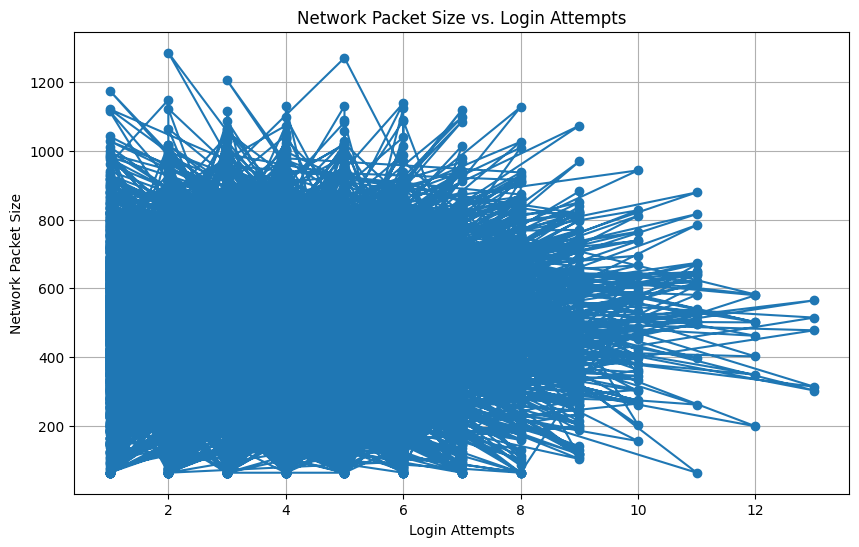

In [ ]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(CS['login_attempts'], CS['network_packet_size'], marker='o', linestyle='-')
plt.xlabel('Login Attempts')
plt.ylabel('Network Packet Size')
plt.title('Network Packet Size vs. Login Attempts')
plt.grid(True)
plt.show()


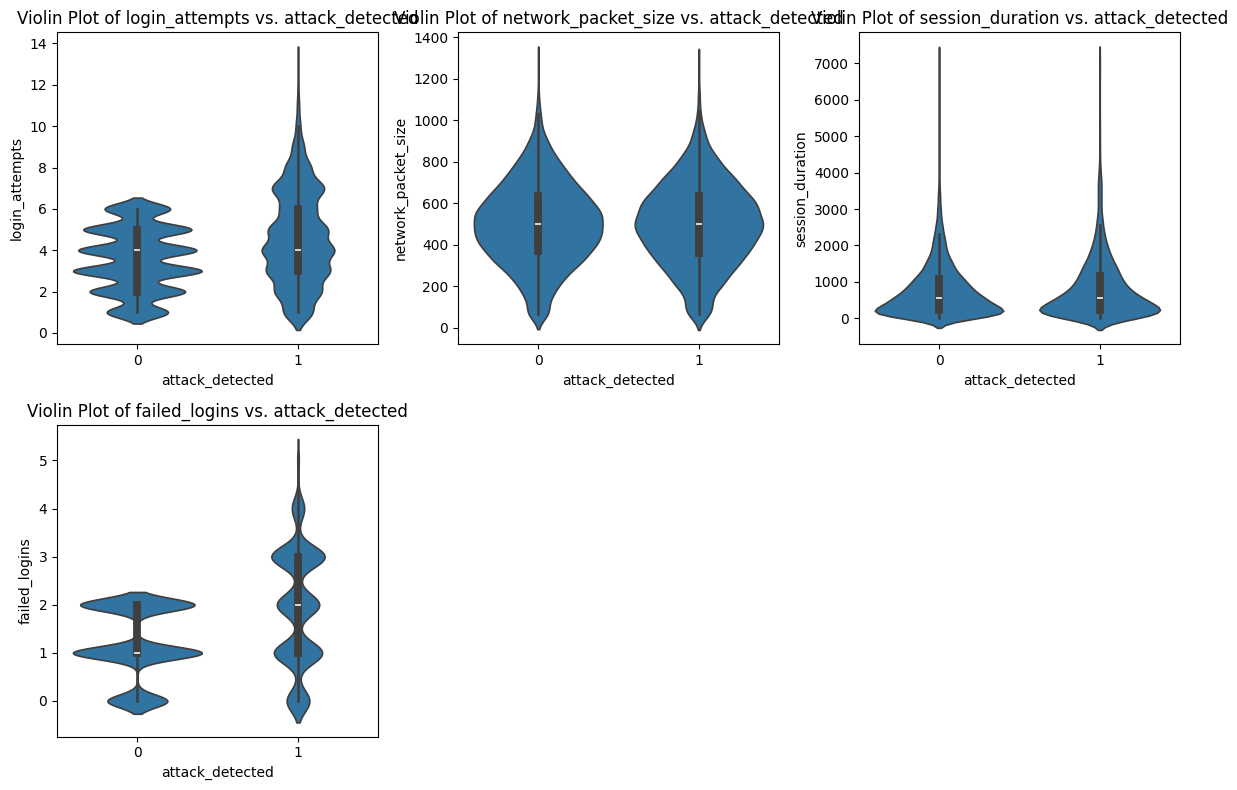

In [ ]:
num_columns = ['login_attempts', 'network_packet_size', 'session_duration', 'failed_logins']

#Violin Plots for Numerical Features
plt.figure(figsize=(12,8))
for i, col in enumerate(num_columns):
  plt.subplot(2, 3, i+1)
  sns.violinplot(x='attack_detected', y=col, data=CS)
  plt.title(f'Violin Plot of {col} vs. attack_detected')
plt.tight_layout()
plt.show()



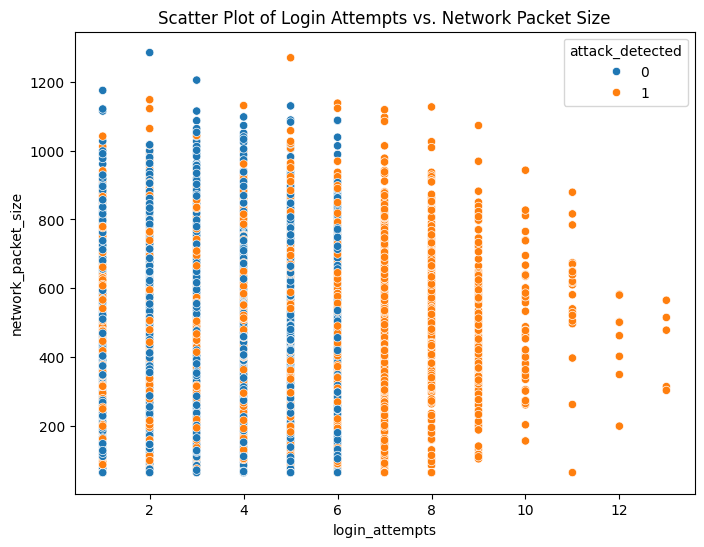

In [ ]:
# Scatter plot of login attempts vs. network packet size, colored by attack detection
plt.figure(figsize=(8, 6))
sns.scatterplot(x='login_attempts', y='network_packet_size', hue='attack_detected', data=CS)
plt.title('Scatter Plot of Login Attempts vs. Network Packet Size')
plt.show()


<ipython-input-67-36bf2d2e7739>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-67-36bf2d2e7739>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-67-36bf2d2e7739>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

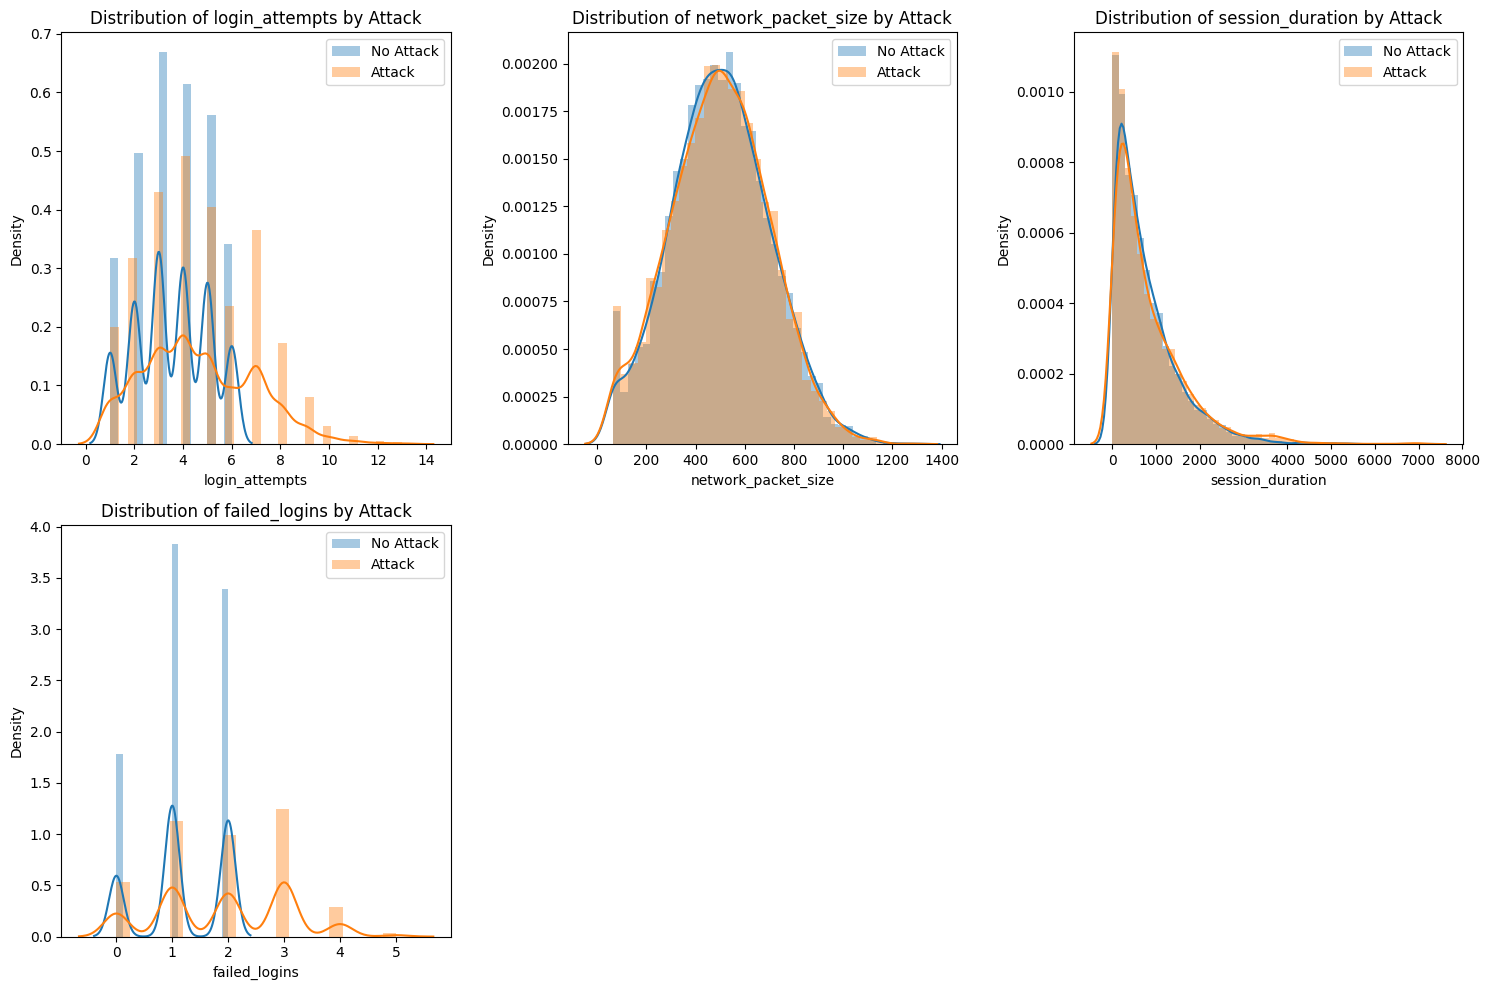

In [ ]:
# Distribution plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    plt.subplot(2, 3, i + 1)  # Adjust subplot layout as needed
    sns.distplot(CS[col][CS['attack_detected'] == 0], label='No Attack')
    sns.distplot(CS[col][CS['attack_detected'] == 1], label='Attack')
    plt.title(f'Distribution of {col} by Attack')
    plt.legend()
plt.tight_layout()
plt.show()


PreProcess

In [ ]:
from sklearn.preprocessing import RobustScaler
encode_to_columns = ['network_packet_size','login_attempts','session_duration',
                     'ip_reputation_score','failed_logins']
scaler = RobustScaler()
CS[encode_to_columns] = scaler.fit_transform(CS[encode_to_columns])

CS = CS.drop(["protocol_type","encryption_used"], axis=1)

CS = pd.get_dummies(CS, columns=["browser_type"], drop_first=True)

Model


Accuracy:
Logistic Regression: 0.7469
Decision Tree: 0.8344
Random Forest: 0.8947


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:25:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost: 0.8863
SVM: 0.8905
KNN: 0.8454
Gradient Boosting: 0.8941


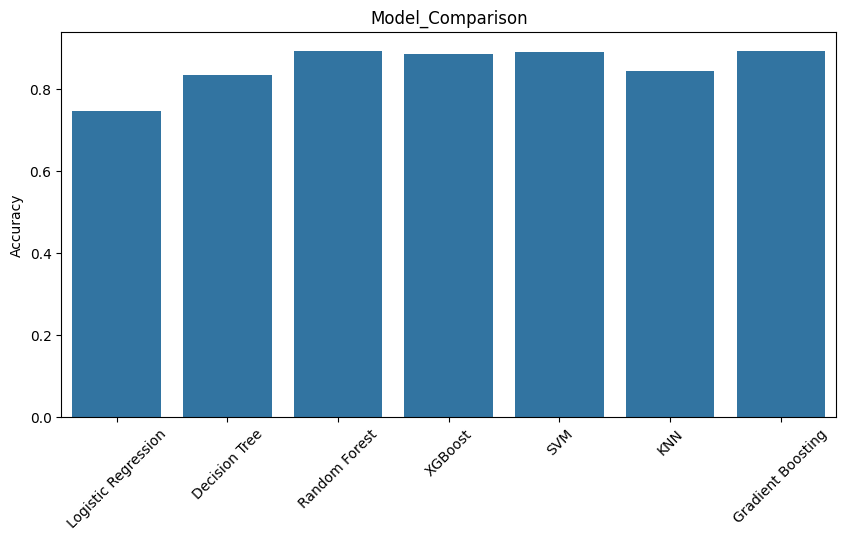

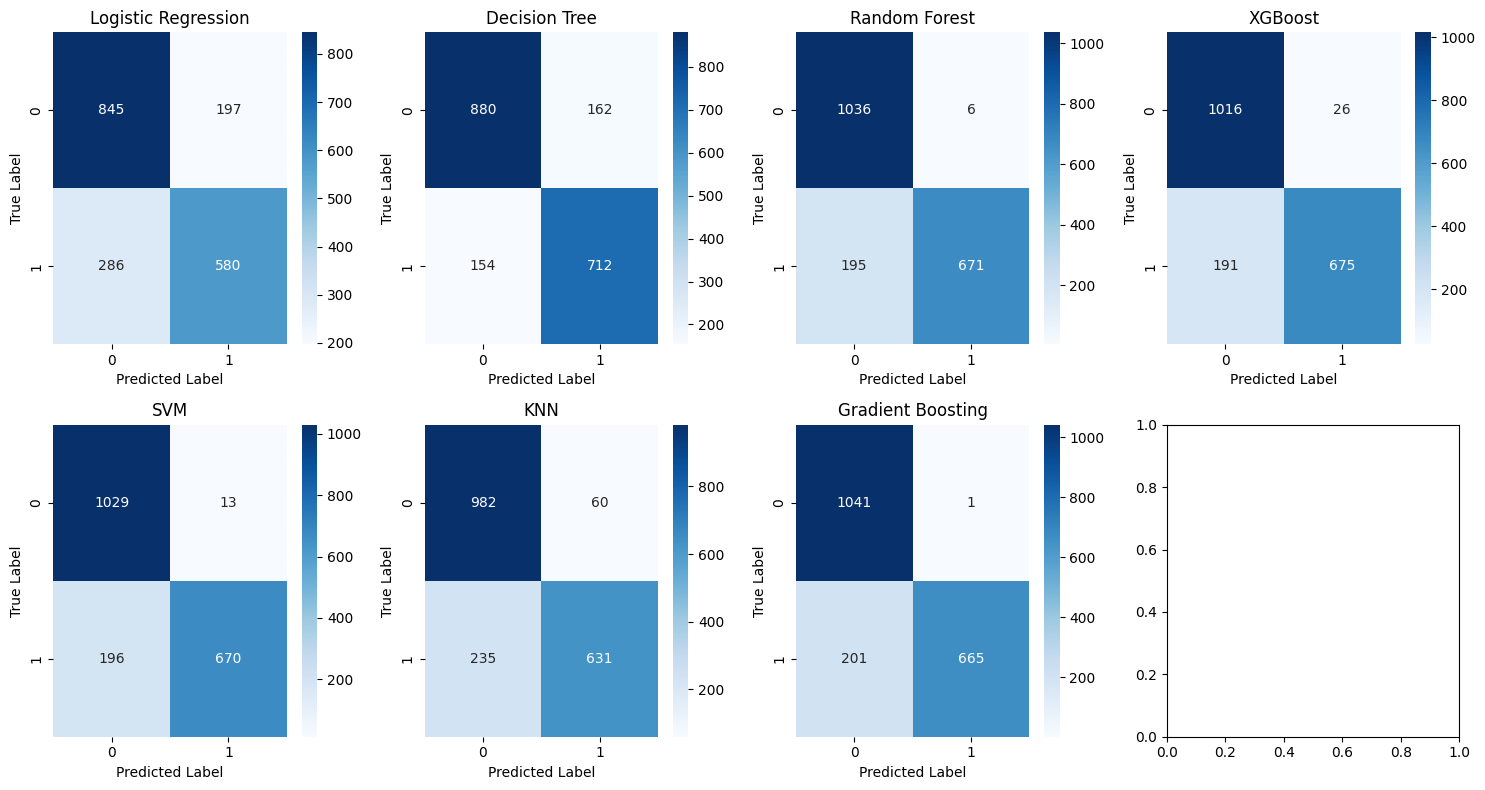

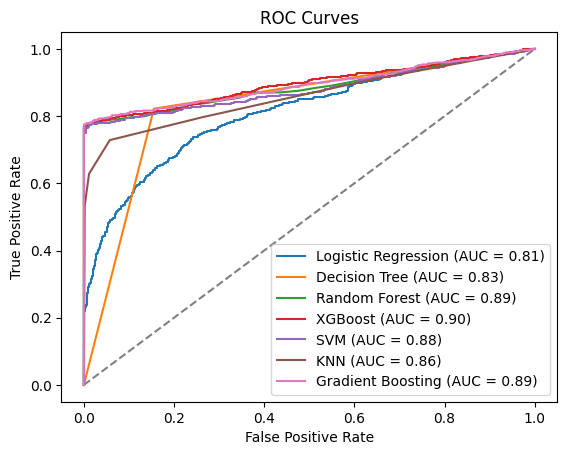

In [ ]:
X = CS.drop(["attack_detected"], axis=1)
y = CS["attack_detected"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

accuracy_scores = {}
print("Accuracy:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name}: {acc:.4f}")

plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xticks(rotation=45)
plt.title("Model_Comparison")
plt.ylabel("Accuracy")
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()
for idx, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.legend()
plt.show()